<a href="https://colab.research.google.com/github/codybaraks/Final-Project-WK13---DS/blob/master/R_Missing_data_in_R_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [0]:
library(tidyverse)
library(magrittr)
library(grid)
theme_set(theme_bw())
options(warn = -1)
library(devtools)
install_github("vqv/ggbiplot", force = TRUE)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

Loading required package: usethis


digest (0.6.21 -> 0.6.22) [CRAN]
rlang  (0.4.0  -> 0.4.1 ) [CRAN]


Installing 2 packages: digest, rlang
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


✔  checking for file ‘/tmp/RtmpCR2UJz/remotes7a7d20d752/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


### **More Imports**

In [0]:
library(ggbiplot)
install_github("espanta/lubripack", force = TRUE)
library(lubripack)
lubripack(c('gridExtra', 'ggcorrplot', 'ggExtra', 'caret', 'DataExplorer', 'Hmisc', 'pastecs', 'psych', 'corrplot', 'factoextra', 'Rtsne'))

Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



✔  checking for file ‘/tmp/RtmpCR2UJz/remotes7a52e20fee/Espanta-lubripack-b1dd9ee/DESCRIPTION’
─  preparing ‘lubripack’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘lubripack_0.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘zip’, ‘lava’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘prodlim’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘igraph’, ‘checkmate’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘colourpicker’, ‘miniUI’, ‘shinyjs’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘data.table’, ‘networkD3’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘htmlTable’, ‘viridis’, ‘mnormt’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching package: ‘s


Bellow Packages Successfully Installed:

   gridExtra   ggcorrplot      ggExtra        caret DataExplorer        Hmisc 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
     pastecs        psych     corrplot   factoextra        Rtsne 
        TRUE         TRUE         TRUE         TRUE         TRUE 


In [0]:
#Import the dataset
data <- read.csv("online_shoppers_intention.csv")

In [154]:
#Read the head of the dataset
head(data,10)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.20000000,0,0.0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.10000000,0,0.0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.20000000,0,0.0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.14000000,0,0.0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.05000000,0,0.0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.02456140,0,0.0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.20000000,0,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
1,-1,0,-1,1,-1.000000,0.20000000,0.20000000,0,0.0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
0,0,0,0,2,37.000000,0.00000000,0.10000000,0,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE


In [79]:
# Check the tail of the dataset
tail(data,10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
12321,0,0.00,0,0,8,143.5833,0.014285714,0.050000000,0.00000,0,Nov,2,2,3,1,Returning_Visitor,FALSE,FALSE
12322,0,0.00,0,0,6,0.0000,0.200000000,0.200000000,0.00000,0,Nov,1,8,4,1,Returning_Visitor,FALSE,FALSE
12323,6,76.25,0,0,22,1075.2500,0.000000000,0.004166667,0.00000,0,Dec,2,2,4,2,Returning_Visitor,FALSE,FALSE
12324,2,64.75,0,0,44,1157.9762,0.000000000,0.013953488,0.00000,0,Nov,2,2,1,10,Returning_Visitor,FALSE,FALSE
12325,0,0.00,1,0,16,503.0000,0.000000000,0.037647059,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145.00,0,0,53,1783.7917,0.007142857,0.029030612,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0.00,0,0,5,465.7500,0.000000000,0.021333333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0.00,0,0,6,184.2500,0.083333333,0.086666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75.00,0,0,15,346.0000,0.000000000,0.021052632,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE


In [80]:
#view the data types
str(data)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [155]:
#check the length of the dataset
length(data)

[1] 18

In [156]:
#View the size of the dataset
dim(data)

[1] 12330    18

In [157]:
#View the  variables dataset
names(data)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [158]:
#check the summary
summary(data)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

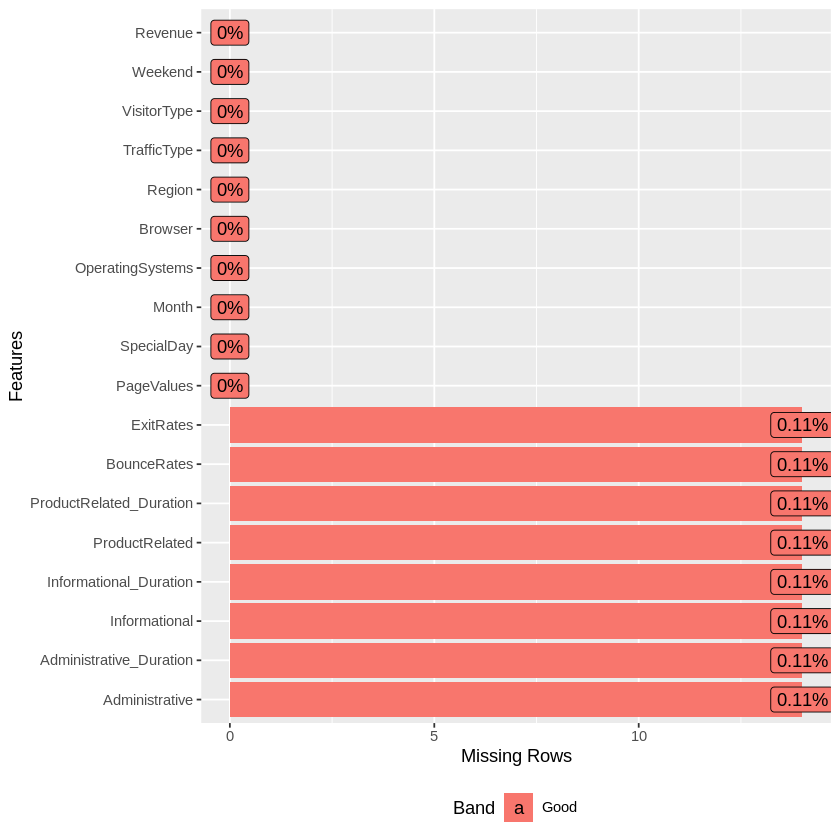

In [159]:
# plotting the missing values
plot_missing(data)

In [160]:
#check the number of missing values
colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [161]:
#Dropping the missing rows and checking to see if they have been removed
data = na.omit(data)
colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [69]:
#duplicates have been removed
data <- duplicated(data)
sum(data)

[1] 12328

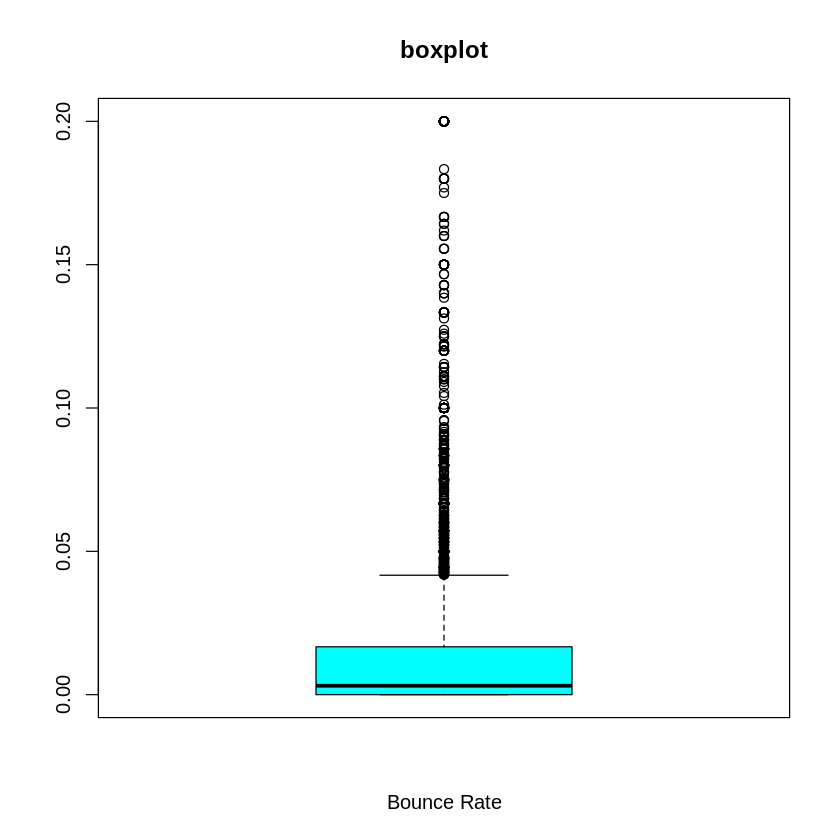

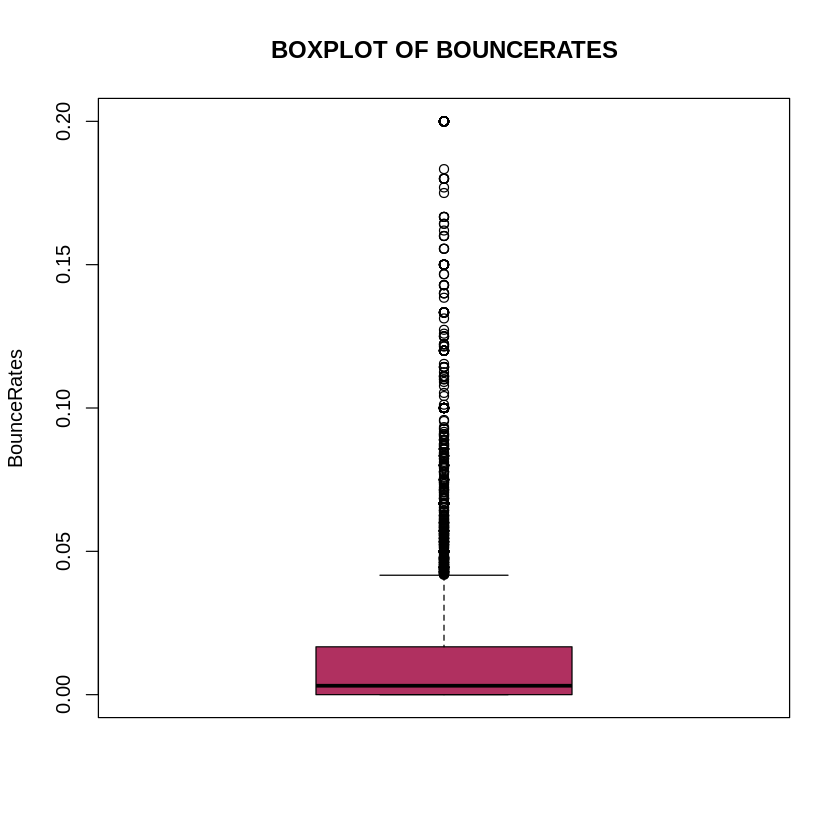

In [138]:
# BoxPlot

boxplot(data$BounceRates,main="boxplot",xlab="Bounce Rate",col=5)
boxplot(data$BounceRates,
       main = toupper("Boxplot of BounceRates"),
       ylab = "BounceRates",
       col = "maroon")

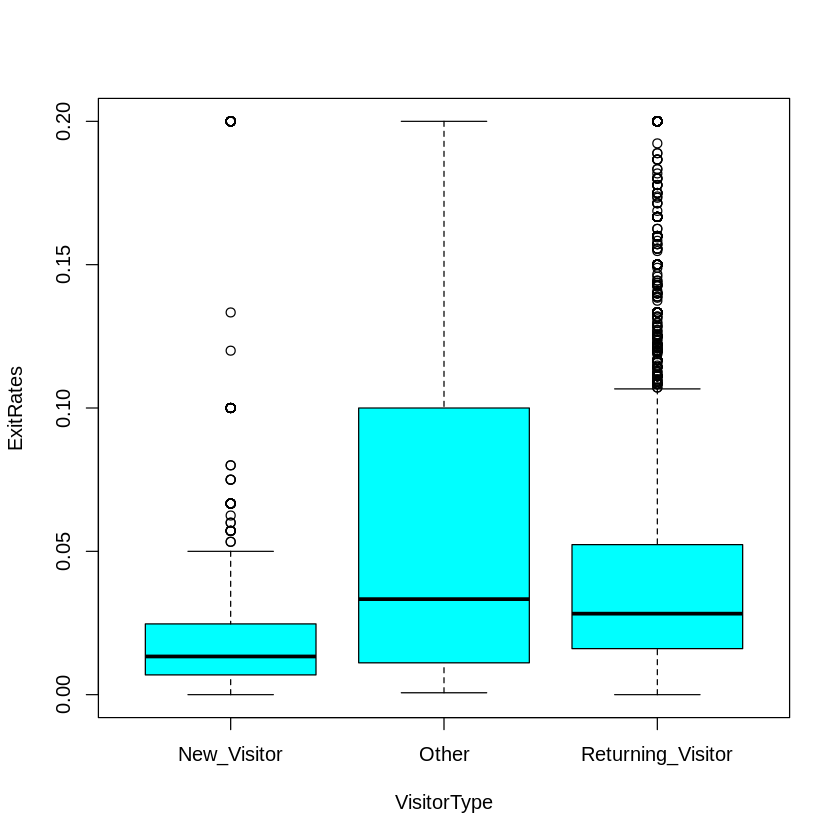

In [127]:
#boxplot for vistor type
boxplot(ExitRates~VisitorType,data = data, col=5)

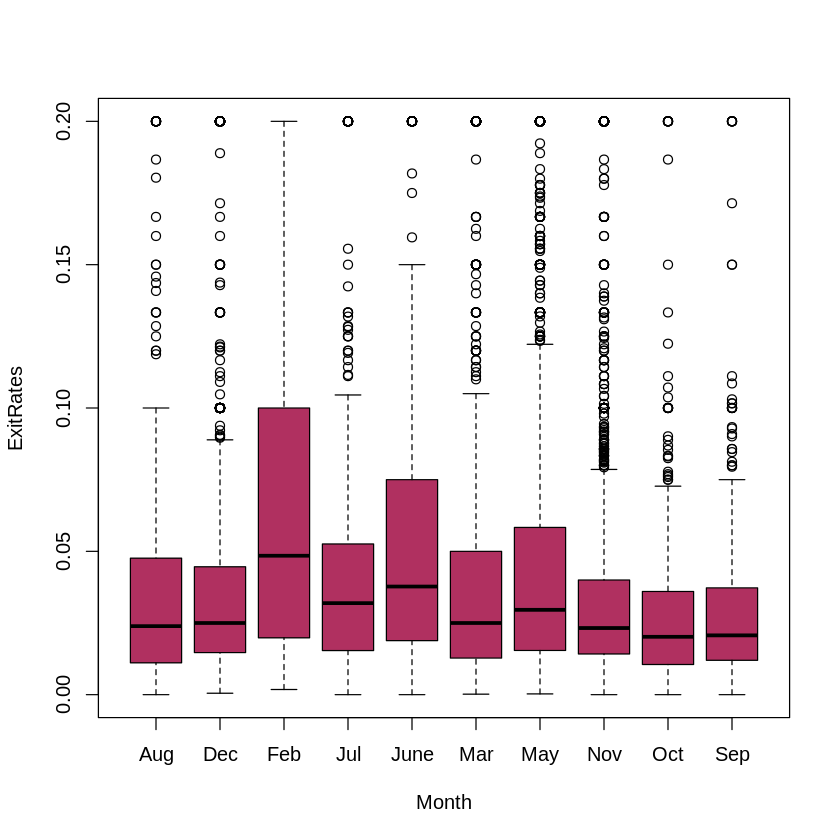

In [139]:
#Month boxplot
boxplot(ExitRates~Month,data = data, col="maroon")

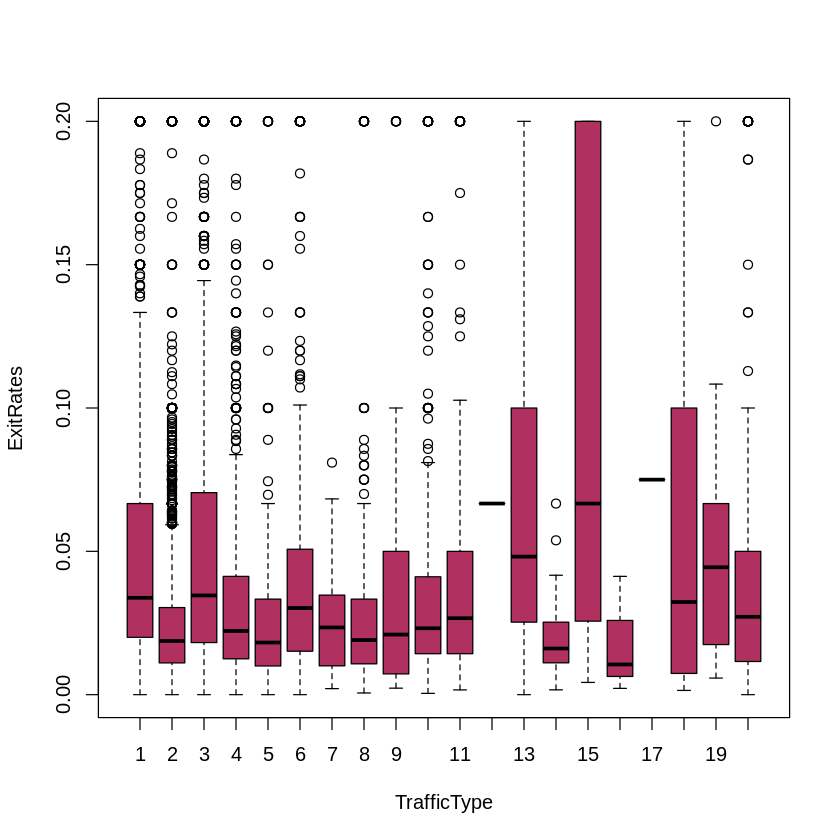

In [140]:
#TrafficType boxplot
boxplot(ExitRates~TrafficType,data = data, col="maroon")

### **Univariate Analysis**

### **Measure of central Tendancy and Dispersion**

In [0]:
#BounceRates
mean(data$BounceRates)


In [0]:
#Describing stats
stat.desc(df$BounceRates)

In [0]:
#Frequency
table(data$Revenue)

### **Histogrram**

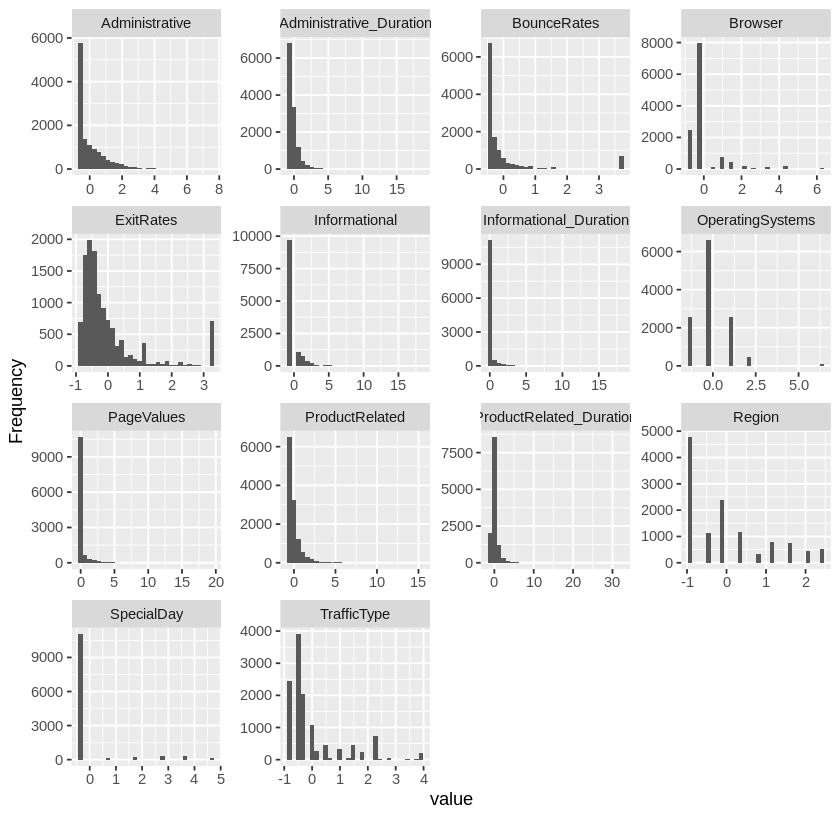

In [219]:
#colors = c("red", "yellow", "green", "violet", "orange") 
#col=colors,main="Old Faithful Eruptions"
plot_histogram(data)

### **Bivariate Analysis**

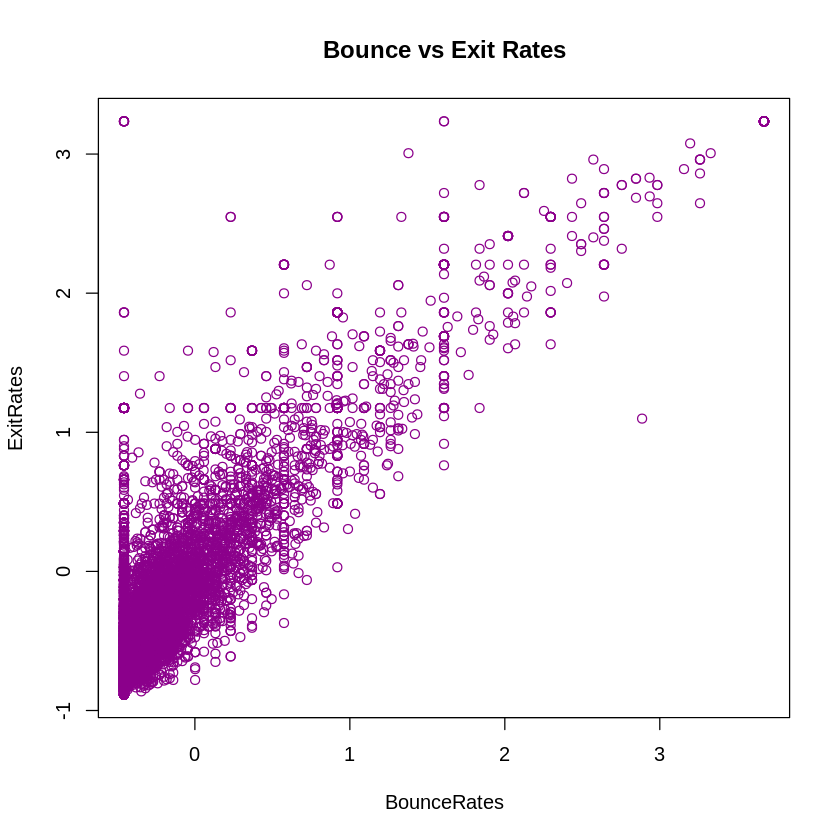

In [220]:
#scatter plot
plot(ExitRates ~ BounceRates, dat = data, 
      col = "darkmagenta",
      main = "Bounce vs Exit Rates")

**There's a positive corelation on the Bounce rates and Exit Rate**

In [0]:
#Visitors as per the month
data %>%
    ggplot(aes(Month)) +
    geom_bar(aes(fill = VisitorType))+
    labs(title = "Stacked Chart: Visitor Type by Month")

### **Multivariate Analysis**

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates
Administrative,1.00,0.60,0.38,0.26,0.43,0.37,-0.22
Administrative_Duration,0.60,1.00,0.30,0.24,0.29,0.36,-0.14
Informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.12
Informational_Duration,0.26,0.24,0.62,1.00,0.28,0.35,-0.07
ProductRelated,0.43,0.29,0.37,0.28,1.00,0.86,-0.20
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1.00,-0.18
BounceRates,-0.22,-0.14,-0.12,-0.07,-0.20,-0.18,1.00


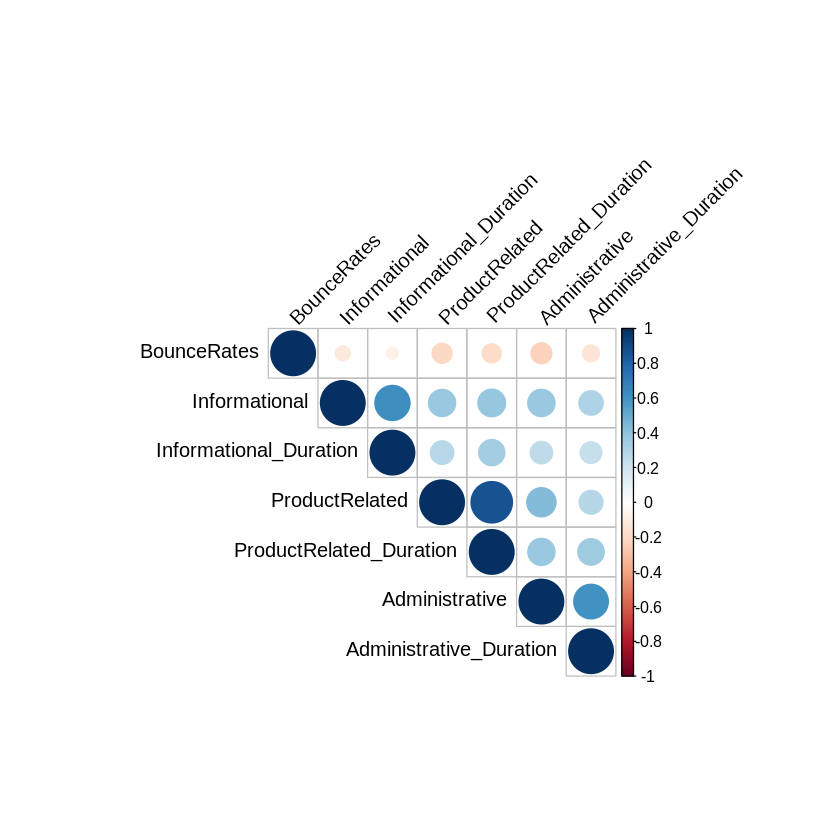

In [223]:
#Correlation plots
res <- cor(data[,1:7])
round(res, 2)

corrplot(res, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)



# **PairPlot**

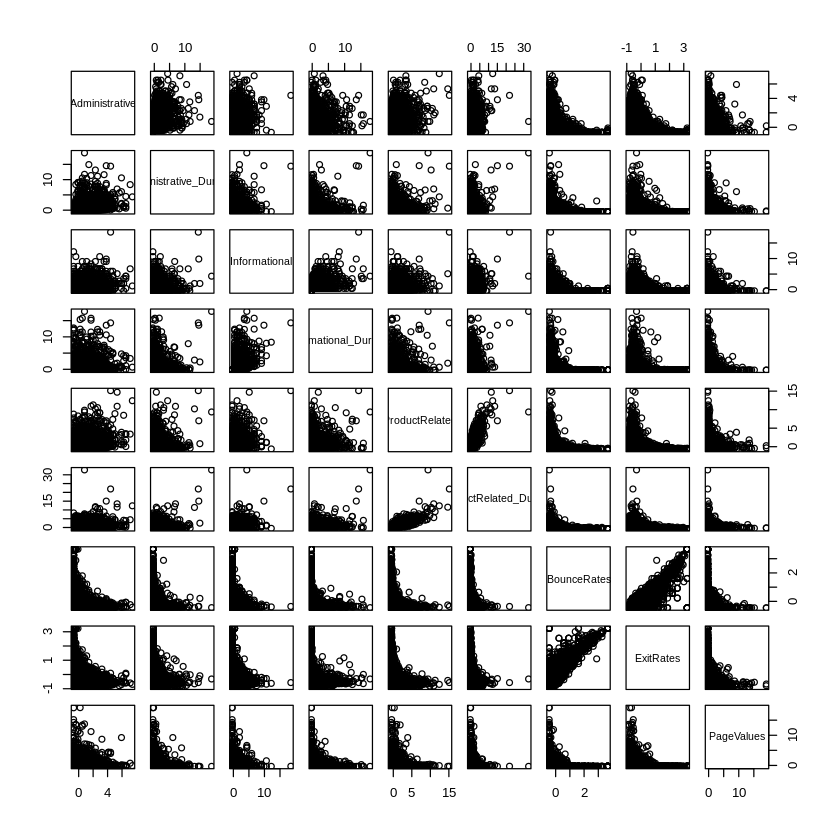

In [224]:
#Pair Plots
pairs(data[,1:9])

In [0]:
# Factor variables changed to their appropriate data type.
data$OperatingSystems = as.factor(data$OperatingSystems)
data$Browser=as.factor(data$Browser)
data$Region=as.factor(data$Region)
data$Weekend=as.factor(data$Weekend)
data$Revenue=as.factor(data$Revenue)

In [0]:
## converting factor variables into numerical
dmy = dummyVars(" ~ .", data = data)
data = data.frame(predict(dmy, newdata = data))

In [163]:
#Confirming that data has been encoded
str(data)

'data.frame':	12316 obs. of  31 variables:
 $ Administrative               : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration      : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration       : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated               : num  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration      : num  0 64 -1 2.67 627.5 ...
 $ BounceRates                  : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates                    : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay                   : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month.Aug                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Month.Dec                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Month.Feb                    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Month.Jul                    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Month.June                   : num  0 0 0 0 0 0 0 0 0 0 .

In [0]:
#Normalize the data
#Standardaizing the data
data = as.data.frame(apply(data, 2,  function(x) (x - min(x))/max(x) - min(x)))

In [165]:
#Pca - scaling
pca_data <- prcomp(data[,-1], scale=TRUE)
## we strip the first column (shoppers labels) from the data set
## scale = TRUE: variables are first standardized. Default is FALSE
pca_data

Standard deviations (1, .., p=30):
 [1] 1.854347e+00 1.585625e+00 1.425100e+00 1.367208e+00 1.335949e+00
 [6] 1.285199e+00 1.194630e+00 1.129256e+00 1.061412e+00 1.042436e+00
[11] 1.028385e+00 1.019193e+00 1.018342e+00 1.014752e+00 1.004714e+00
[16] 9.726591e-01 9.658391e-01 9.144946e-01 8.745079e-01 8.646643e-01
[21] 7.962412e-01 7.877044e-01 7.458861e-01 6.130835e-01 3.638980e-01
[26] 2.750312e-01 8.234954e-16 2.605633e-16 2.123019e-16 1.954972e-16

Rotation (n x k) = (30 x 30):
                                        PC1          PC2          PC3
Administrative_Duration       -0.2421445169  0.130446188 -0.012172494
Informational                 -0.2765874341  0.251591557 -0.031652262
Informational_Duration        -0.2359004576  0.235620815 -0.025557416
ProductRelated                -0.3508541774  0.297325799  0.018512769
ProductRelated_Duration       -0.3526010953  0.309035591  0.023812592
BounceRates                    0.2969138352  0.102553978  0.080626219
ExitRates               

In [167]:
#Carry out Pca
shoppers <- predict(pca_data)
shoppers

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
1,3.9142080,1.3094988,0.7085622,-1.88242252,1.1746200,-2.078716357,-3.06398641,0.482617127,-1.750650,-0.86071682,⋯,0.74928200,0.21558934,-1.7262209,0.056730783,0.191482113,0.26961116,-2.812748e-16,-1.566458e-15,2.111005e-17,1.505729e-15
2,1.9894985,0.5704900,0.4701567,-0.29834482,1.2247897,-0.567771142,-0.01050151,0.010229530,-1.548342,-1.07807824,⋯,0.25857922,0.56841226,-1.6650957,-0.056467380,-0.195907068,-1.02848801,-6.976084e-16,-1.483192e-15,-6.215668e-17,1.283685e-15
3,4.0442522,0.8905083,1.3169848,-1.53163914,-1.1245178,-1.872160017,-2.31276189,0.578718266,-1.365103,0.02450954,⋯,-0.24147073,1.66708925,-1.6964071,0.035107361,0.182208691,0.21737085,-6.420973e-16,-1.483192e-15,-2.842013e-16,1.339196e-15
4,2.6367539,0.6511420,0.8219626,-0.69167375,0.2215669,-0.917772391,-0.66587176,0.087733922,-1.326043,-0.81200691,⋯,-0.02902738,1.10243459,-1.6738268,-0.028127685,-0.125556676,-0.94433781,-6.698528e-16,-1.566458e-15,-1.176678e-16,1.283685e-15
5,1.2828834,0.1476246,-2.2119845,-1.11585250,-0.6839526,-0.237284769,0.50135661,-0.009109716,-1.514037,-0.89660877,⋯,-0.05257447,1.19460026,-1.7152375,-0.083340045,-0.091983463,-0.04265385,-7.253640e-16,-1.344414e-15,7.662120e-17,7.979622e-16
6,1.4103914,0.5566259,0.4093704,0.01016802,1.2643315,-0.267606070,0.46277662,-0.200291354,-1.549001,-1.07601922,⋯,0.29816455,0.59308345,-1.6992351,-0.035117613,0.294416034,0.23259566,-5.865861e-16,-1.372169e-15,3.264214e-16,1.339196e-15
7,4.2216901,1.2571661,1.2882210,-2.00428750,-0.3457737,-0.838197609,-2.71363993,0.505227730,-1.368922,-0.64112055,⋯,-0.22291091,0.82529499,-0.1738305,0.141771077,0.173761312,0.30846210,-4.478082e-16,-1.510947e-15,-1.176678e-16,1.505729e-15
8,3.6145663,0.8416982,-2.0175461,-2.96363640,-0.4366985,-1.888449471,-2.92235858,0.472137796,-1.780087,-0.68652052,⋯,0.65131826,0.44618886,-1.7445548,0.063250004,0.182416757,0.25493726,-4.200526e-16,-1.372169e-15,-2.286901e-16,7.979622e-16
9,2.4934734,0.9851677,0.6557245,-0.89460073,1.0109519,1.600827566,-0.33020446,-0.146814768,-1.458794,-1.27676466,⋯,-0.39985970,-0.21131591,1.2661171,0.021209742,-0.231426621,-0.94932310,-1.419253e-15,-1.205636e-15,1.598879e-16,1.061640e-15
10,1.5533508,0.6466379,0.6138055,-0.12359972,0.9309014,0.924396590,0.66348780,-0.132896433,-1.432189,-1.20991741,⋯,-0.24735019,0.49850031,-0.1738498,-0.027668498,-0.224543131,0.20021408,-8.086307e-16,-1.288903e-15,2.986658e-16,1.394707e-15


In [173]:
#Looking at the pca objects
str(shoppers)
summary(shoppers)

 num [1:12316, 1:30] 3.91 1.99 4.04 2.64 1.28 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:12316] "1" "2" "3" "4" ...
  ..$ : chr [1:30] "PC1" "PC2" "PC3" "PC4" ...


      PC1                PC2               PC3               PC4         
 Min.   :-24.8626   Min.   :-9.2691   Min.   :-3.6229   Min.   :-5.9185  
 1st Qu.: -0.8567   1st Qu.:-0.3182   1st Qu.:-0.2035   1st Qu.:-0.7943  
 Median :  0.2719   Median : 0.2781   Median : 0.3853   Median : 0.1441  
 Mean   :  0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:  1.0262   3rd Qu.: 0.7739   3rd Qu.: 0.7638   3rd Qu.: 0.8365  
 Max.   :  4.4239   Max.   :21.5991   Max.   : 9.1913   Max.   : 9.6804  
      PC5                PC6               PC7                PC8          
 Min.   :-14.2897   Min.   :-2.7610   Min.   :-13.0332   Min.   :-4.38074  
 1st Qu.: -0.5454   1st Qu.:-0.8019   1st Qu.: -0.7241   1st Qu.:-0.62075  
 Median :  0.1690   Median :-0.4285   Median :  0.3492   Median : 0.07765  
 Mean   :  0.0000   Mean   : 0.0000   Mean   :  0.0000   Mean   : 0.00000  
 3rd Qu.:  0.7368   3rd Qu.: 0.8880   3rd Qu.:  0.8094   3rd Qu.: 0.75521  
 Max.   :  2.5972   Max.  

In [180]:
library(devtools)
install_github("vqv/ggbiplot")

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation


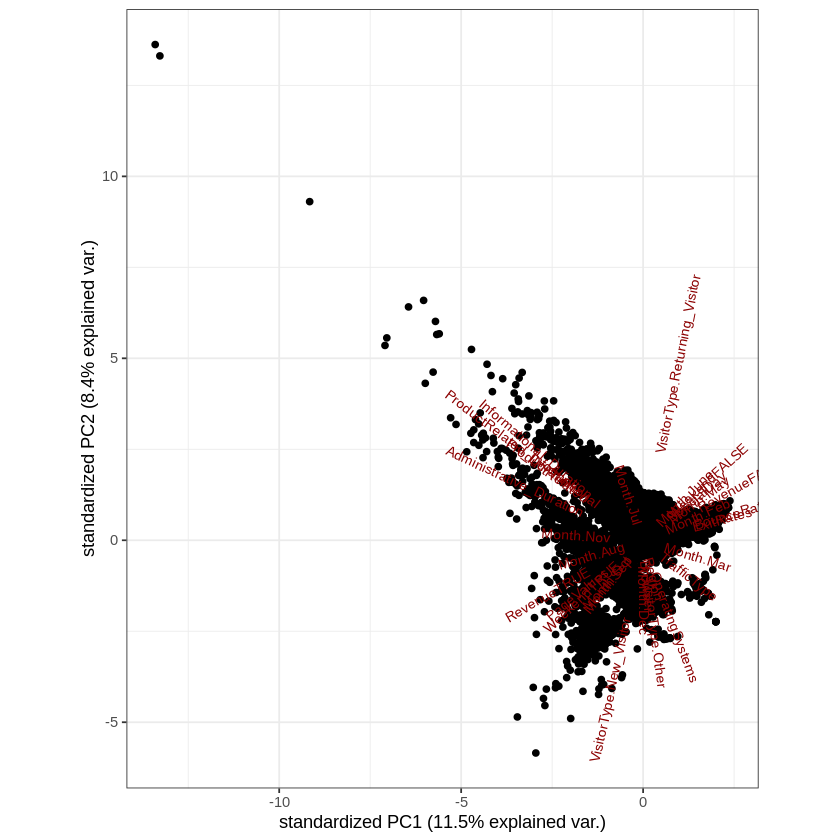

In [181]:
#Plotting the PCA
library(ggbiplot)
ggbiplot(pca_data)

In [0]:
#The above shows that Both components had the highest variance - Pc1 and pc2, 8.4% and 11.5%

## **K-means Clustering**

In [182]:

#Applying the  k-Means Clustering Algorithm with no centroid(k)=3
results <- kmeans(na.omit(data),3) # this helps in omitting NA

results$size



[1] 9076 1908 1332

In [184]:

# Getting the value of cluster center datapoint value(3 centers for k=3)
results$center


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType.New_Visitor,VisitorType.Other,VisitorType.Returning_Visitor,WeekendFALSE,WeekendTRUE,RevenueFALSE,RevenueTRUE
0.07586961,1.021147,0.01951116,1.012936,0.04335040,1.017950,0.13949051,0.25323765,0.005711500,0.07567210,⋯,-0.8993203,-0.7643969,-0.8477633,0.000000,0.0009916263,0.9990084,0.7811811,0.2188189,1,0
0.12568911,1.035449,0.03275681,1.022991,0.06838322,1.029344,0.02558576,0.09777584,0.075365536,0.02316562,⋯,-0.8882035,-0.7686350,-0.8489256,0.221174,0.0083857442,0.7704403,0.7384696,0.2615304,0,1
0.09673562,1.027954,0.01429555,1.007702,0.02325517,1.008670,0.03702332,0.12248879,0.003820316,0.01981982,⋯,-0.8805729,-0.7299800,-0.8341967,0.954955,0.0450450450,0.0000000,0.7147147,0.2852853,1,0


In [185]:

#Getting cluster vectors to check where each vector falls 
results$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    2     1     1     1     1     1     1     1     1     1     1     2     1 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    1     1     3     1     1     1     1     1     1     1     2     1     1 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  157   158   159   160   161   162   163   164   165   166   167   168   169 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  170   171   172   173   174   175   176   177   178   179   180   181   182 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  183   184   185   186   187   188   189   190   191   192   193   194   195 
    1     1     1     1     1     1     2     1     1     1     1     1     1 
  196   197   198   199   200   201   202   203   204   205   206   207   208 
    1     2     1     2     2     2     1     3     1     1     3     2     3 
  209   210   211   212   213   214   215   216   217   218   219   220   221 
    3     1     1     1     1     1     1     1     1     1     1     1     2 
  222   223   224   225   226   227   228   229   230   231   232   233   234 
    1     1     3     1     1     1     1     2     1     1     1     1     1 
  235   236   237   238   239   240   241   242   243   244   245   246   247 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  248   249   250   251   252   253   254   255   256   257   258   259   260 
    1     2     1     1     1     1     1     1     1     1     1     1     3 
  261   262   263   264   265   266   267   268   269   270   271   272   273 
    1     1     2     1     1     2     1     1     1     1     1     1     3 
  274   275   276   277   278   279   280   281   282   283   284   285   286 
    1     1     1     2     1     1     1     1     2     1     1     1     1 
  287   288   289   290   291   292   293   294   295   296   297   298   299 
    1     1     1     1     1     1     1     1     2     2     1     1     1 
  300   301   302   303   304   305   306   307   308   309   310   311   312 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
  313   314   315   316   317   318   319   320   321   322   323   324   325 
    1     1     1     1     1     1     1     1     2     1     1     3     1 
  326   327   328   329   330   331   332   333   334 

In [186]:
# Visualizing the  clustering results
par(mfrow = c(3,4,5,6), mar = c(5,4,2,2))


ERROR: ignored

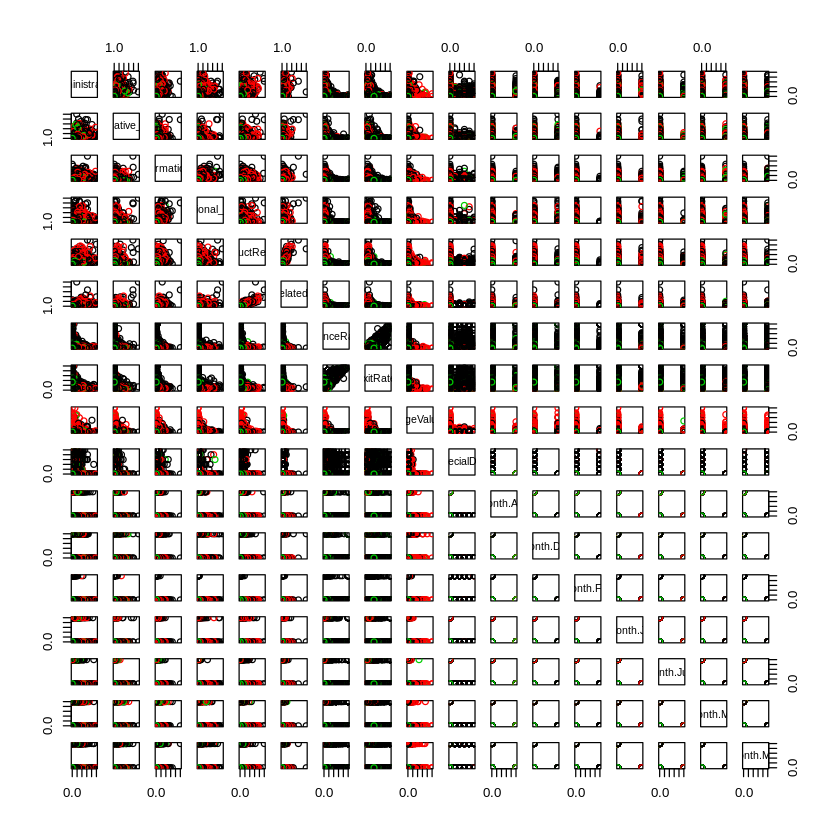

In [189]:
#Visualizing the clusters
plot(data[,1:17], col = results$cluster) 

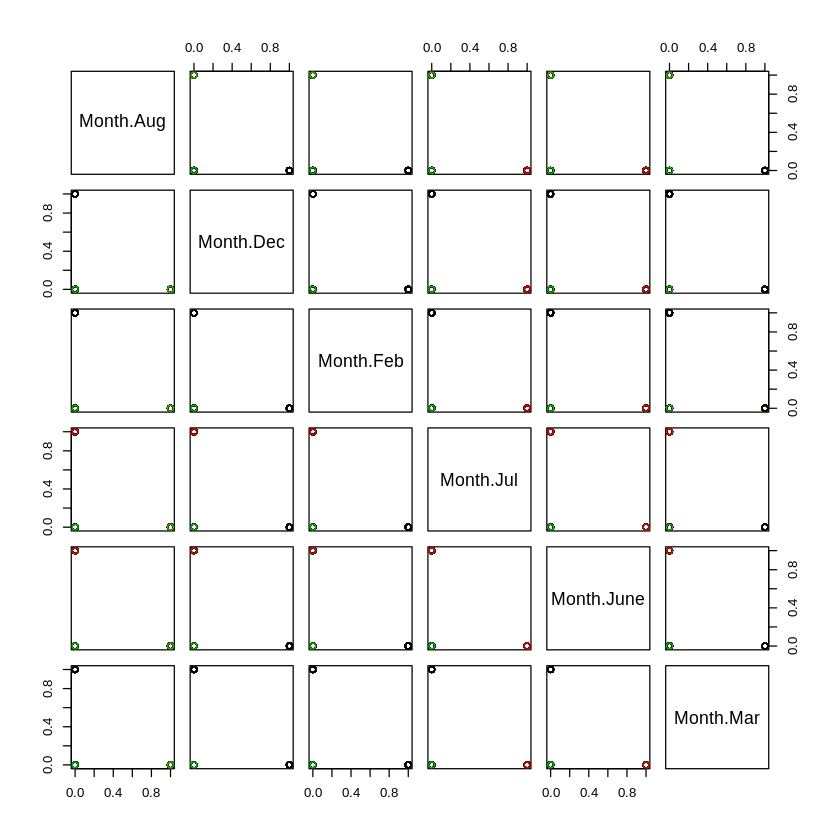

In [192]:
#Visualizing only the Month and visitor type
#plot(airquality_new[c(3,4)],col = results$cluster)
plot(data[c(11:16)], col = results$cluster) 

In [0]:
#Result of the table
table(results$cluster,data)

## **Hierachicial Clustering**

In [194]:
#Previewing the dataset
head(data,10)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType.New_Visitor,VisitorType.Other,VisitorType.Returning_Visitor,WeekendFALSE,WeekendTRUE,RevenueFALSE,RevenueTRUE
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00000000,1.000294,0,1.000392,0.001418440,1.000016,1.00000000,1.0000000,0,0.0,⋯,-1.0000000,-1.0000000,-1.00,0,0,1,1,0,1,0
0.00000000,1.000294,0,1.000392,0.002836879,1.001016,0.00000000,0.5000000,0,0.0,⋯,-0.9230769,-1.0000000,-0.95,0,0,1,1,0,1,0
0.00000000,1.000000,0,1.000000,0.001418440,1.000000,1.00000000,1.0000000,0,0.0,⋯,-1.0000000,-0.1111111,-0.90,0,0,1,1,0,1,0
0.00000000,1.000294,0,1.000392,0.002836879,1.000057,0.25000000,0.7000000,0,0.0,⋯,-0.9230769,-0.8888889,-0.85,0,0,1,1,0,1,0
0.00000000,1.000294,0,1.000392,0.014184397,1.009824,0.10000000,0.2500000,0,0.0,⋯,-0.8461538,-1.0000000,-0.85,0,0,1,0,1,1,0
0.00000000,1.000294,0,1.000392,0.026950355,1.002426,0.07894737,0.1228070,0,0.0,⋯,-0.9230769,-1.0000000,-0.90,0,0,1,1,0,1,0
0.00000000,1.000000,0,1.000000,0.001418440,1.000000,1.00000000,1.0000000,0,0.4,⋯,-0.7692308,-0.7777778,-0.90,0,0,1,1,0,1,0
0.03703704,1.000000,0,1.000000,0.001418440,1.000000,1.00000000,1.0000000,0,0.0,⋯,-0.9230769,-1.0000000,-0.80,0,0,1,0,1,1,0
0.00000000,1.000294,0,1.000392,0.002836879,1.000594,0.00000000,0.5000000,0,0.8,⋯,-0.9230769,-0.8888889,-0.90,0,0,1,1,0,1,0


In [0]:
# Before hierarchical clustering, we can compute some descriptive statistics
# ---
# 
desc_stats <- data.frame(
  Min = apply(df, 2, min),    # minimum
  Med = apply(df, 2, median), # median
  Mean = apply(df, 2, mean),  # mean
  SD = apply(df, 2, sd),      # Standard deviation
  Max = apply(df, 2, max)     # Maximum
)
desc_stats <- round(desc_stats, 1)
head(desc_stats)

In [196]:
#Scaling the data
data <- scale(data)
head(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Browser,Region,TrafficType,VisitorType.New_Visitor,VisitorType.Other,VisitorType.Returning_Visitor,WeekendFALSE,WeekendTRUE,RevenueFALSE,RevenueTRUE
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6914734,-0.6247671,3.67247746,3.2352400,-0.3173633,-0.309001,⋯,-0.7901988,-0.8941841,-0.76292777,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.5913358,-0.45743910,1.1745443,-0.3173633,-0.309001,⋯,-0.2081361,-0.8941841,-0.51445574,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
-0.6975533,-0.4631119,-0.3966145,-0.2521304,-0.6914734,-0.6252895,3.67247746,3.2352400,-0.3173633,-0.309001,⋯,-0.7901988,2.4360812,-0.26598370,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.6689966,-0.6233742,0.57504004,1.9988226,-0.3173633,-0.309001,⋯,-0.2081361,-0.4779009,-0.01751167,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.4891823,-0.2969835,-0.04444744,0.1441964,-0.3173633,-0.309001,⋯,0.3739266,-0.8941841,-0.01751167,-0.3993337,-0.0833606,0.410877,-1.8161802,1.8161802,0.4281421,-0.4281421
-0.6975533,-0.4574578,-0.3966145,-0.2450294,-0.2868911,-0.5442099,-0.13139305,-0.3800157,-0.3173633,-0.309001,⋯,-0.2081361,-0.8941841,-0.26598370,-0.3993337,-0.0833606,0.410877,0.5505615,-0.5505615,0.4281421,-0.4281421


In [0]:
#Making use of the hclust for hierachical
#Performing euclidean distance
d <- dist(data, method = "euclidean")

In [0]:
#Making use of the ward method
res.hc <- hclust(d, method = "ward.D2" )

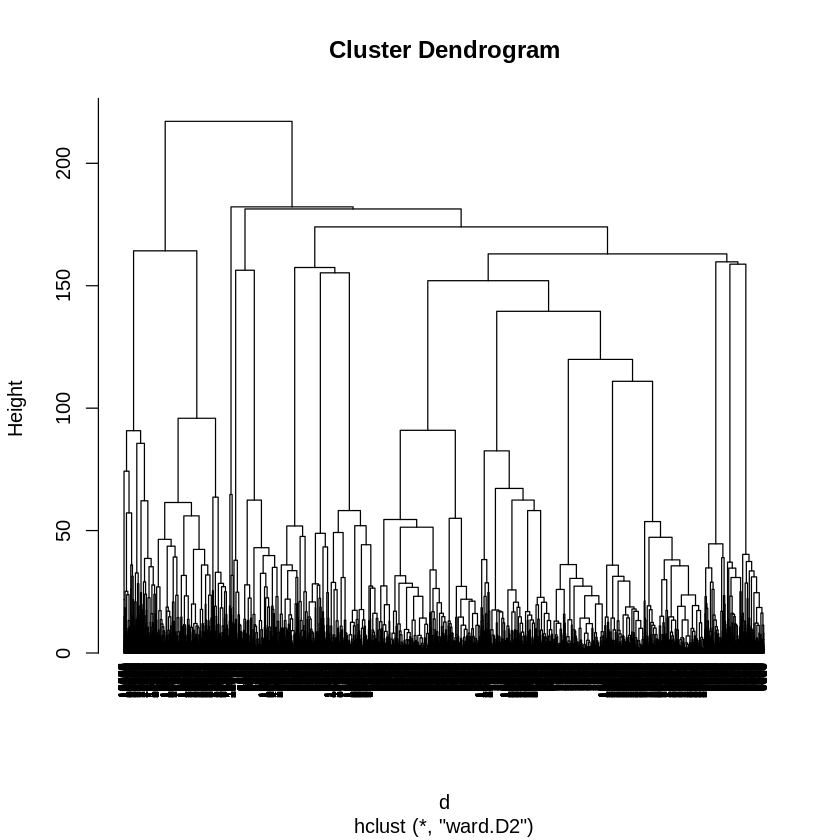

In [202]:
#Making use of the obtained dendrogram

plot(res.hc, cex = 0.6, hang = -1)